# Zombie Humans ratio

Consider that in a world of 300 people,

125 are Humans and 175 are Zombies

Every day 
* 20percent of Humans convert to Zombies
* 10percent of Zombies convert back to Humans
    
Assumptions
- Total population remains the same
- There is no cure or immune system development

## What will be the Population of Zombies and Humans in the long Run

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

In [2]:
H=125
Z=175

In [3]:
def day_simulation(h0,z0):
    h = 0.8 * h0 + 0.1 * z0
    z = 0.2 * h0 + 0.9 * z0
    h_int=int(h)
    z_int=300-h_int
    return (h_int,z_int)

In [4]:
h=H
z=Z
humans,zombies=[],[]
for i in np.arange(1,10):
    h,z=day_simulation(h,z)
    humans.append(h)
    zombies.append(z)
    print("Day {} Humans {} Zombies {}".format(i,h,z))

Day 1 Humans 117 Zombies 183
Day 2 Humans 111 Zombies 189
Day 3 Humans 107 Zombies 193
Day 4 Humans 104 Zombies 196
Day 5 Humans 102 Zombies 198
Day 6 Humans 101 Zombies 199
Day 7 Humans 100 Zombies 200
Day 8 Humans 100 Zombies 200
Day 9 Humans 100 Zombies 200


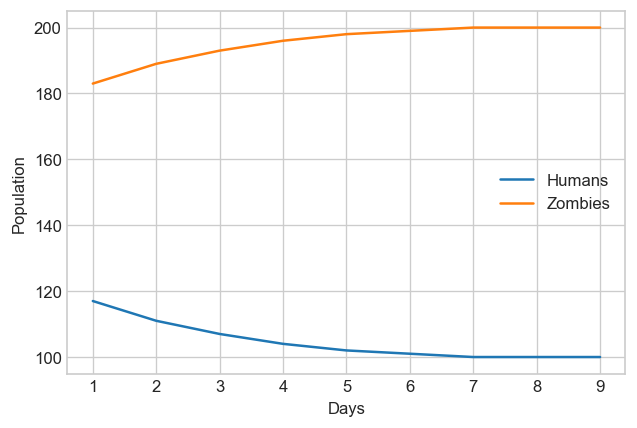

In [5]:
plt.figure(dpi=120)
plt.plot(np.arange(1,10),humans,label="Humans")
plt.plot(np.arange(1,10),zombies,label="Zombies")
plt.xlabel("Days")
plt.ylabel("Population")
plt.legend()
plt.show()

In [6]:
print("Humans percentage is ",h/(h+z))
print("Zombie percentage is ",z/(h+z))

Humans percentage is  0.3333333333333333
Zombie percentage is  0.6666666666666666


# Using Matrix Method

In [7]:
mat=np.matrix([[0.8,0.1],[0.2,0.9]])
mat

matrix([[0.8, 0.1],
        [0.2, 0.9]])

In [8]:
np.matrix([125,175])

matrix([[125, 175]])

In [9]:
np.matrix([[125],[175]])

matrix([[125],
        [175]])

In [10]:
mat.dot(np.matrix([[125],[175]]))

matrix([[117.5],
        [182.5]])

In [11]:
for i in range(10):
    print("Day {}\n".format(i),(mat**i).dot(np.matrix([[125],[175]])))

Day 0
 [[125.]
 [175.]]
Day 1
 [[117.5]
 [182.5]]
Day 2
 [[112.25]
 [187.75]]
Day 3
 [[108.575]
 [191.425]]
Day 4
 [[106.0025]
 [193.9975]]
Day 5
 [[104.20175]
 [195.79825]]
Day 6
 [[102.941225]
 [197.058775]]
Day 7
 [[102.0588575]
 [197.9411425]]
Day 8
 [[101.44120025]
 [198.55879975]]
Day 9
 [[101.00884018]
 [198.99115983]]


# Method 3

In [12]:
x=np.arange(10,200,20)
y=np.arange(10,200,20)

In [13]:
X,Y=np.meshgrid(x,y)
print(X[:5,:5],"\n\n",Y[:5,:5])

[[10 30 50 70 90]
 [10 30 50 70 90]
 [10 30 50 70 90]
 [10 30 50 70 90]
 [10 30 50 70 90]] 

 [[10 10 10 10 10]
 [30 30 30 30 30]
 [50 50 50 50 50]
 [70 70 70 70 70]
 [90 90 90 90 90]]


In [14]:
X1 = 0.8 * X + 0.1 * Y
Y1 = 0.2 * X + 0.9 * Y
print(X1[:5,:5],"\n\n",Y1[:5,:5])

[[ 9. 25. 41. 57. 73.]
 [11. 27. 43. 59. 75.]
 [13. 29. 45. 61. 77.]
 [15. 31. 47. 63. 79.]
 [17. 33. 49. 65. 81.]] 

 [[11. 15. 19. 23. 27.]
 [29. 33. 37. 41. 45.]
 [47. 51. 55. 59. 63.]
 [65. 69. 73. 77. 81.]
 [83. 87. 91. 95. 99.]]


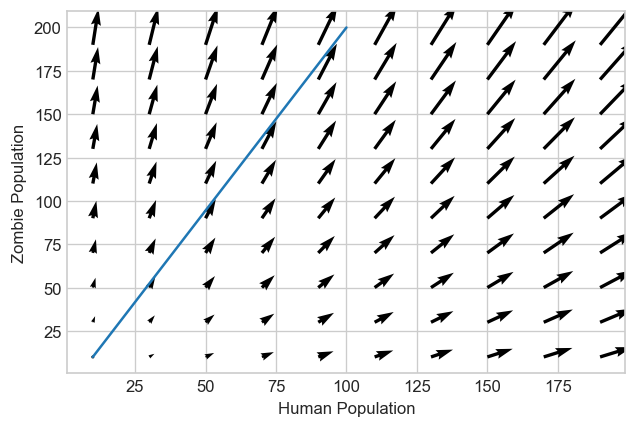

In [15]:
plt.figure(dpi=120)
plt.quiver(X,Y,X1,Y1)
plt.plot([10,100],[10,200])
plt.xlabel("Human Population")
plt.ylabel("Zombie Population")
plt.show()

# Above Operation in a function for multiple calls

In [16]:
def matrix_simuation(X0,Y0,interation=1):
    for i in np.arange(interation):
        X1 = 0.8 * X0 + 0.1 * Y0
        Y1 = 0.2 * X0 + 0.9 * Y0
        X0,Y0=X1,Y1
    return (X1,Y1)

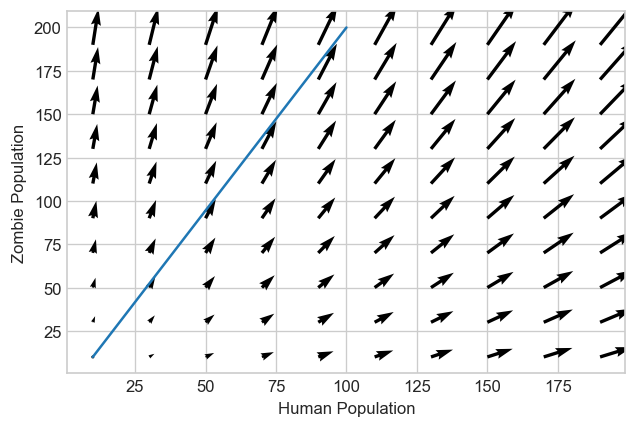

In [17]:
x=np.arange(10,200,20)
y=np.arange(10,200,20)
X,Y=np.meshgrid(x,y)


plt.figure(dpi=120)
X1,Y1=matrix_simuation(X,Y)
plt.quiver(X,Y,X1,Y1)
plt.plot([10,100],[10,200])
plt.xlabel("Human Population")
plt.ylabel("Zombie Population")
plt.show()

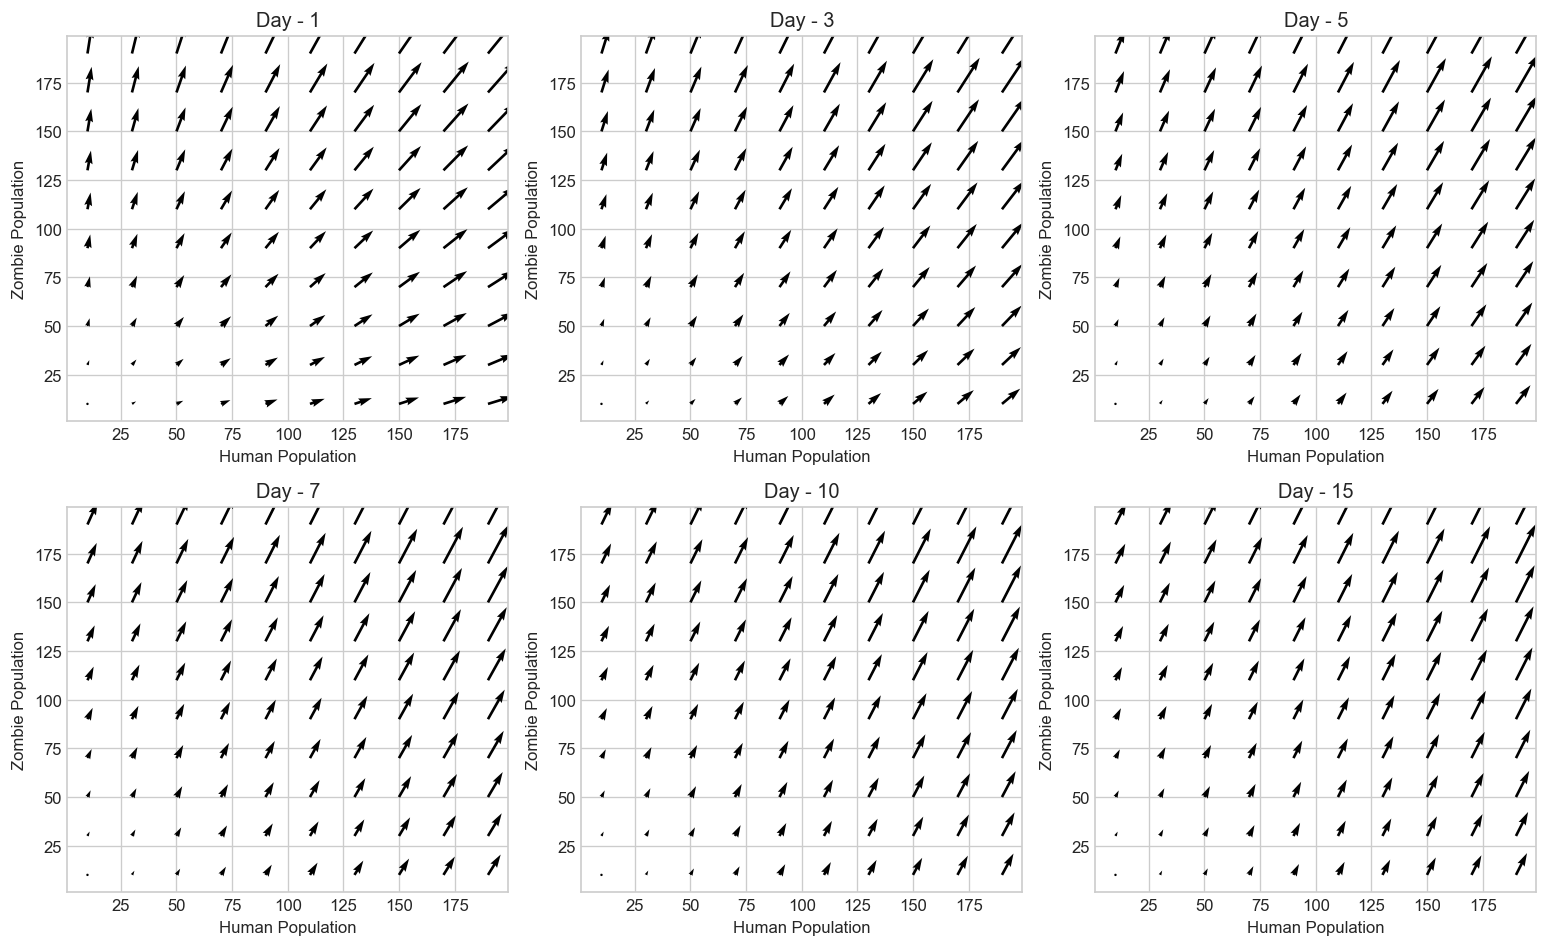

In [18]:
x=np.arange(10,200,20)
y=np.arange(10,200,20)
X,Y=np.meshgrid(x,y)

i=[1,3,5,7,10,15]
#i=[1]
l=len(i)

fig = plt.figure(dpi=120,figsize=(13,8))
for j,index in zip(i,np.arange(1,l+1)):
    ax = fig.add_subplot(2,3,index)
    X1,Y1=matrix_simuation(X,Y,j)
    ax.quiver(X,Y,X1,Y1)
    ax.set(xlabel="Human Population",
          ylabel="Zombie Population",
          title="Day - {}".format(j))

plt.tight_layout()
plt.show()